In [25]:
print("Hi")

Hi


kütüphaneleri yükle

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms # görüntü preprocessing işlemleri
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
import numpy as np

veri seti yükleme

In [27]:
def get_data_loaders(batch_size=128):
    transform = transforms.Compose([
        transforms.ToTensor(), # görüntüyü tensore çevir 0-255 -> 0-1
        transforms.Normalize((0.5,),(0.5,)) # -1 <-> 1 
        ,])
    train_set = torchvision.datasets.MNIST(root="./data",train=True,download=True,transform=transform)
    test_set = torchvision.datasets.MNIST(root="./data",train=False,download=True,transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)
    return train_loader,test_loader

train_dataloader,test_dataloader = get_data_loaders()

veri görselleştirme

torch.Size([1, 28, 28])


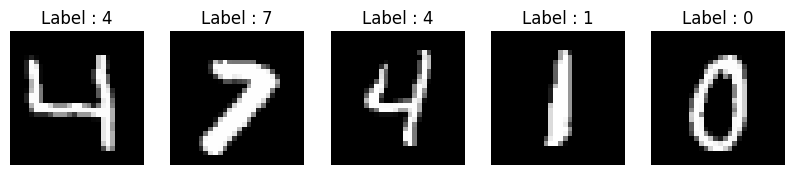

In [28]:
def visualize_data(dataloader,n):
    images,labels = next(iter(dataloader))
    fig,axis = plt.subplots(1,n,figsize=(10,5))
    print(images[0].shape)
    for i in range(n):
        axis[i].imshow(images[i].squeeze(),cmap="gray")
        axis[i].set_title(f"Label : {labels[i].item()}")
        axis[i].axis("off")
    plt.show()
visualize_data(train_dataloader,5)

model tanımlama

In [29]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        # görüntüyü 1D vektöre dönüştür
        self.flatten = nn.Flatten()
        # tam bağlı katmanların oluşturulması
        self.fc1 = nn.Linear(28*28,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.fcFin = nn.Linear(32,10)
        # aktivasyon fonksiyonlarımız
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()


    def forward(self,x):
        # initial x = 28*28
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        x = self.fcFin(x)
        return x
        

oluştur ve derle

In [30]:
model = NeuralNetwork().to(device)
define_loss_and_optimizer = lambda model: (nn.CrossEntropyLoss(),optim.Adam(model.parameters(),lr=0.001))
criterion,optimizer = define_loss_and_optimizer(model)

eğitim

1/200, Loss:  0.00505
2/200, Loss:  0.00504
3/200, Loss:  0.00491
4/200, Loss:  0.00502
5/200, Loss:  0.00494
6/200, Loss:  0.00496
7/200, Loss:  0.00493
8/200, Loss:  0.00486
9/200, Loss:  0.00487
10/200, Loss:  0.00487
11/200, Loss:  0.00484
12/200, Loss:  0.00481
13/200, Loss:  0.00484
14/200, Loss:  0.00484
15/200, Loss:  0.00478
16/200, Loss:  0.00474
17/200, Loss:  0.00472
18/200, Loss:  0.00472
19/200, Loss:  0.00469
20/200, Loss:  0.00464
21/200, Loss:  0.00466
22/200, Loss:  0.00464
23/200, Loss:  0.00463
24/200, Loss:  0.00462
25/200, Loss:  0.00457
26/200, Loss:  0.00460
27/200, Loss:  0.00448
28/200, Loss:  0.00450
29/200, Loss:  0.00447
30/200, Loss:  0.00446
31/200, Loss:  0.00448
32/200, Loss:  0.00438
33/200, Loss:  0.00436
34/200, Loss:  0.00435
35/200, Loss:  0.00426
36/200, Loss:  0.00422
37/200, Loss:  0.00416
38/200, Loss:  0.00415
39/200, Loss:  0.00426
40/200, Loss:  0.00409
41/200, Loss:  0.00422
42/200, Loss:  0.00405
43/200, Loss:  0.00388
44/200, Loss:  0.004

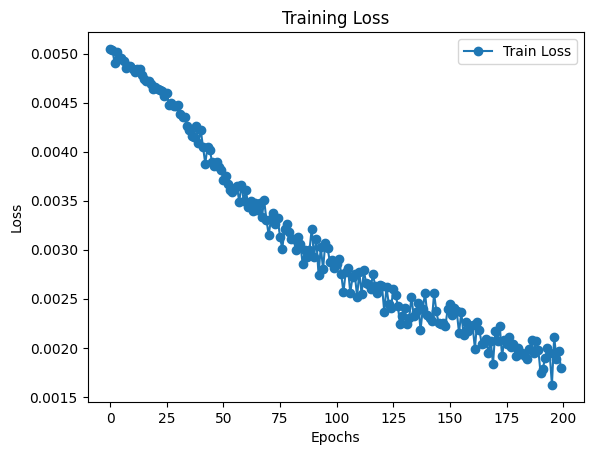

In [31]:
def train_model(model,train_dataloader,criterion,optimizer,epochs=10):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        total_loss = 0
        for images,labels in train_dataloader:
            images,labels = images.to(device),labels.to(device) # gpu ya yollamak için
        optimizer.zero_grad()
        predictions = model(images)
        loss = criterion(predictions,labels)
        loss.backward()
        optimizer.step()

        total_loss = total_loss + loss.item()
        avg_loss = total_loss / len(train_dataloader) 
        train_losses.append(avg_loss)
        print(f"{epoch+1}/{epochs}, Loss: {avg_loss: .5f}")
    plt.figure()
    plt.plot(range(epochs),train_losses,marker="o",linestyle="-",label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()
    plt.show()
train_model(model,train_dataloader,criterion,optimizer,200)
        

test

In [32]:
def test_model(model,test_dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images,labels in test_dataloader:
            images,labels = images.to(device),labels.to(device)
            predictions = model(images)
            _,predicted = torch.max(predictions,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy : {100*correct/total:.3f}")
test_model(model,test_dataloader)   


Accuracy : 83.780
